## Introduction
Ce notebook aborde la question de la *résolution* dans représentation du spectre d'un signal à l'aide de la TFD (Transformée de Fourier Discrète). Le terme de *résolution*, associé à celui de *pouvoir de résolution* et originellement utilisé en optique, désigne la capacité à distinguer deux raies dans le spectre. 
Le problème posé est le suivant : une composante sinusoïdale conduit à un pic dans le domaine de Fourier, lorsque deux composantes sont présentes, à quelle condition observe t-on deux pics ? 

Le modèle mathématique du signal observé (de durée finie) est $x(n)=w(n)s(n)$ avec $s(n)=a_0e^{i2\pi \nu_0 n +\phi_0}+a_1e^{i2\pi \nu_1 n+\phi_1}$. $\nu_0$ et $\nu_1$ sont les fréquences réduites des composantes, prenant leur valeurs dans $]-0.5,\; 0.5]$. $w(n)$ est une fenêtre de durée finie, par exemple $w(n)=\mathbf{1}_{n\in[0,\; N-1]}$. 

Une fois bien compris les principes, exercez-vous sur le signal mystère !!

#### mots clefs : 
TFD, résolution, fenêtrage, durée d'observation

#### prérequis
* vidéo sur la TFD et la TFtd
* notebook "Changement de représentation"
* notebook "Fourier.TFD.précision"
* avoir fait le td TFD, résolution est un plus.

## Résolution et durée observation (ou *d'analyse*)

La résolution est un problème central en analyse spectrale et se retrouve dans de nombreux champs disciplinaires (signaux mécaniques, acoustiques, optiques, électroniques, radar...). Les battements obervés dans de nombreux signaux musicaux sont souvent produit par des composantes fréquentielles proches ($\nu_0 \approx \nu_1$). La localisation de sources radar ou sonar dont les directions sont voisines est un problème équivalent. Ici nous allons aborder le sens à donner à $\nu_0 \approx \nu_1$ en fonction de la durée $N$ du signal observé.

### Observation de deux raies d'égale importance

Vos commentaires sont à ajouter dans la cellule suivant le code.

1. Générer le signal $x$ en complétant le code python ci-dessous, et afficher sa TFD en fonction de la fréquence réduite $\nu$.
2. Régler les paramètres d'axe pour zoomer sur les pics fréquentiels
3. Diminuer $N$. Que se passe t-il pour $N=150$, $N=100$  ?
4. Calculer la valeur limite de $N_L$ permettant de séparer les raies (on supposera que cette valeur correspond à des lobes principaux qui ne se recouvrent pas). A quelle durée en seconde cette valeur correspond-elle ?
5. En utilisant la valeur de $N=150$, afficher le spectre avec cette fois un fenêtrage de Hann (**np.hanning**). Expliquer les observations. Que devient $N_L$ avec ce fenêtrage ?


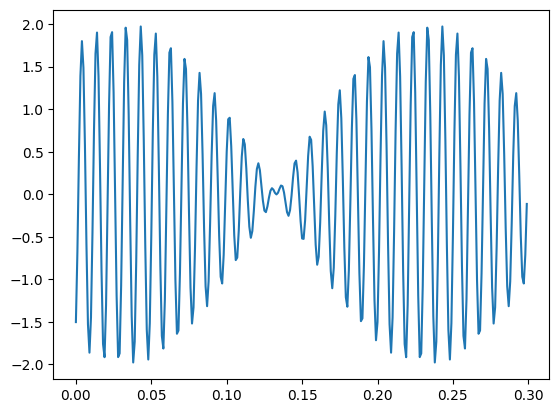

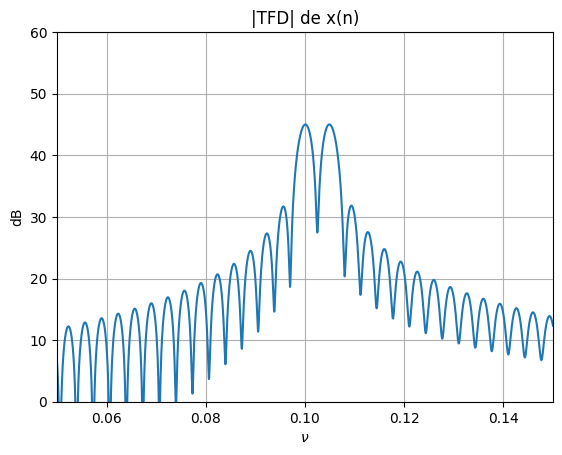

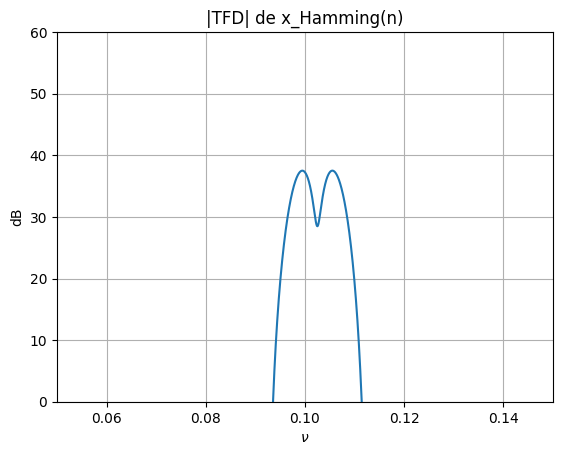

In [ ]:
%matplotlib inline
import numpy as np
from numpy.fft import *
from numpy.random import *
import matplotlib.pyplot as plt

pi = np.pi # la variable pi est prédéfinie dans numpy
i = 1j

# génération du signal
Fe = 1000. # fréquence d'échantillonnage
f0 = 100. # en Hz
f1 = 105. # en Hz
a0 = 1.
a1 = 1.
phi0 = 2*pi*rand()
phi1 = 2*pi*rand()

# durée d'observation
N = 1000

# ici votre code 
nu0 = 2 * pi * f0
nu1 = 2 * pi * f1

#géneration du signal
t = np.arange(N) / Fe 
x = a0 * np.sin(nu0 * t + phi0) + a1 * np.sin(nu1 * t + phi1)

plt.plot(t, np.real(x))
plt.show()

# calcul et représentation du spectre
Nfft = 2**16 # zero-padding généreux (si vous ne voyez pas de quoi on parle, cf. notebook "Fourier.TFD.précision")
TFx = fftshift(fft(x, Nfft))
TFx_hamming = fftshift(fft(x*np.hamming(N), Nfft))
# a completer, TFD de x

nu = np.linspace(-0.5, 0.5, Nfft)

# affichage
plt.figure
plt.plot(nu,20*np.log10(abs(TFx)))
plt.title('|TFD| de x(n)')
plt.ylabel('dB')
plt.xlabel(r'$\nu$') # r permet de "rendre" le texte en Latex
plt.axis([0.05, 0.15, 0, 60])
plt.grid()
plt.show()

plt.figure
plt.plot(nu,20*np.log10(abs(TFx_hamming)))
plt.title('|TFD| de x_Hamming(n)')
plt.ylabel('dB')
plt.xlabel(r'$\nu$') # r permet de "rendre" le texte en Latex
plt.axis([0.05, 0.15, 0, 60])
plt.grid()
plt.show()

------------------------------------------------------------

### Vos commentaires ici :

#### Observations

1. Voir code
2. Voir graphqiues
3. Il y a progressivement un repliement du spectre
4. $N_L$ vaut environ 500
5. On observe un élargissement du lobe principal ainsi qu'une disparition des lobes secondaires ou plus. Du fait de l'élargissement du lobe principal, $N_L$ augmente.

------------------------------------------------------------

## Observation d'une raie faible masquée par une raie forte

Ici il s'agit du même modèle que précédemment mais avec $a_1 = 1/100$. Cela permet d'aborder les cas où les intensités des différentes composantes (ou signaux sources dans la vraie vie) sont différentes.

Vos commentaires sont ajouter dans la cellule suivant le code.

1. Générer les signaux et observer le spectre. Que constatez vous ?
2. Diminuer la valeur de $f_1$. A partir de quelle fréquence $f_L$ ne peut-on plus distinguer la deuxième composante ?
3. Pour $f_1=f_L$ appliquer un fenêtrage de Hann. Expliquer vos observations.


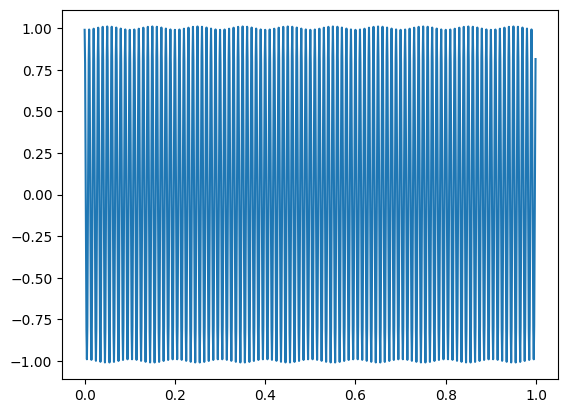

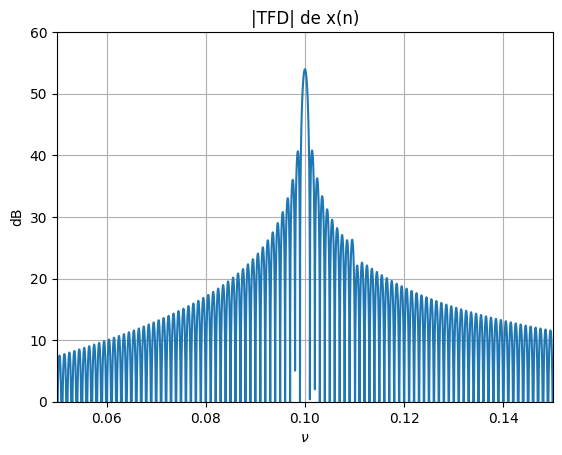

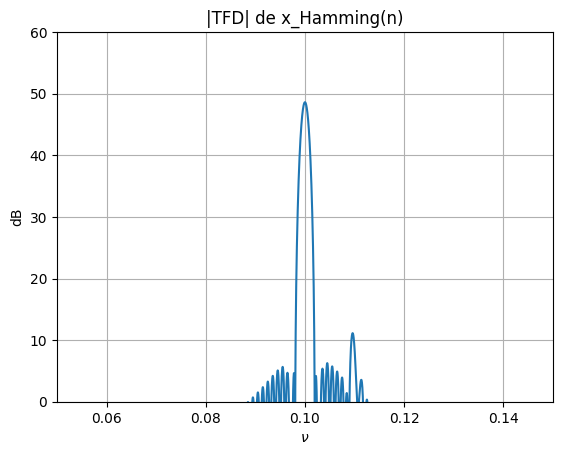

In [2]:
%matplotlib inline
import numpy as np
from numpy.fft import *
from numpy.random import *
import matplotlib.pyplot as plt

pi = np.pi # la variable pi est prédéfinie dans numpy
i = 1j

# génération du signal
Fe = 1000. # fréquence d'échantillonnage
f0 = 100. # en Hz
f1 = 110. # en Hz
a0 = 1.
a1 = 1./100
phi0 = 2*pi*rand()
phi1 = 2*pi*rand()

# durée d'observation
N = 1000

# ici votre code (à copier/coller/modifier à partir de la précédente cellule)

# ici votre code 
nu0 = 2 * pi * f0
nu1 = 2 * pi * f1

#géneration du signal
t = np.arange(N) / Fe 
x = a0 * np.sin(nu0 * t + phi0) + a1 * np.sin(nu1 * t + phi1)

plt.plot(t, np.real(x))
plt.show()

# calcul et représentation du spectre
Nfft = 2**16 # zero-padding généreux (si vous ne voyez pas de quoi on parle, cf. notebook "Fourier.TFD.précision")
TFx = fftshift(fft(x, Nfft))
TFx_hamming = fftshift(fft(x*np.hamming(N), Nfft))
# a completer, TFD de x

nu = np.linspace(-0.5, 0.5, Nfft)

# affichage
plt.figure
plt.plot(nu,20*np.log10(abs(TFx)))
plt.title('|TFD| de x(n)')
plt.ylabel('dB')
plt.xlabel(r'$\nu$') # r permet de "rendre" le texte en Latex
plt.axis([0.05, 0.15, 0, 60])
plt.grid()
plt.show()

plt.figure
plt.plot(nu,20*np.log10(abs(TFx_hamming)))
plt.title('|TFD| de x_Hamming(n)')
plt.ylabel('dB')
plt.xlabel(r'$\nu$') # r permet de "rendre" le texte en Latex
plt.axis([0.05, 0.15, 0, 60])
plt.grid()
plt.show()

------------------------------------------------------------

### Vos commentaires ici :

#### Observations

Comme la fenêtre de Hamming réduit l'amplitude des lobes secondaires, on peut grâce à elle observer le lobe principale du second sinus.
#### Calculs

------------------------------------------------------------

## Le signal mystère

Voici un signal qui contient 4 composantes fréquentielles. A vous d'essayer de les retrouver !!

Utilisez autant de cellules de code que nécessaire et trouver les composantes et commentez vos résultats !

In [ ]:
import sounddevice as sd
import soundfile as sf

#lecture du fichier piano.wav
#le fichier doit se trouver dans le même répertoire que le notebook
# a telecharger dans perso.enst.fr/bedavid/OASIS/Signaux/mystere.wav
x, Fe = sf.read('mystere.wav')

